In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [89]:
df = pd.read_csv('fake_news_benin_multilingue.csv')

In [90]:
df.head()

,text,lang,label
0,Le Ministre de l'Enseignement Supérieur a anno...,fr,0
1,SCANDALE ABSOLU !!! On nous ment ! Des 'source...,fr,1
2,"Cotonou, azɔ̌ e gando alɔdoɖo weziza wu é sín ...",fon,0
3,ÌMỌ̀LẸ̀ TÚTÙ! Àwọn onímọ̀ sáyẹ́ǹsì kan tí a kò...,yoruba,1
4,La Police Républicaine a mené une opération de...,fr,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1345 non-null   object
 1   lang    1345 non-null   object
 2   label   1345 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 31.7+ KB


In [92]:
from collections import Counter

In [94]:
count = Counter(df['lang'])
count

Counter({'fr': 749,
         'fr-yoruba': 174,
         'fr-fon': 171,
         'yoruba': 144,
         'fon': 107})

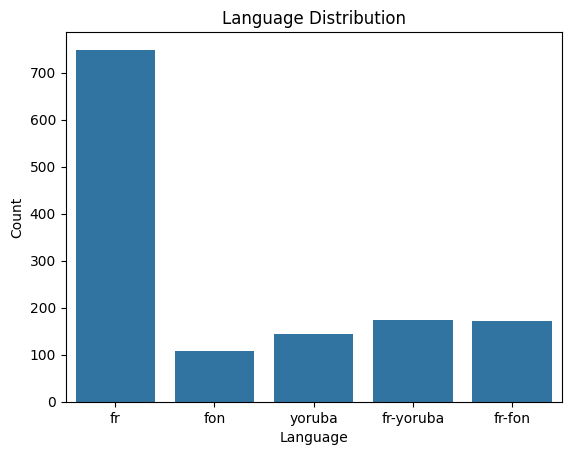

In [95]:
sns.countplot(x=df['lang'])
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [96]:
count = Counter(df['label'])
count

Counter({1: 701, 0: 644})

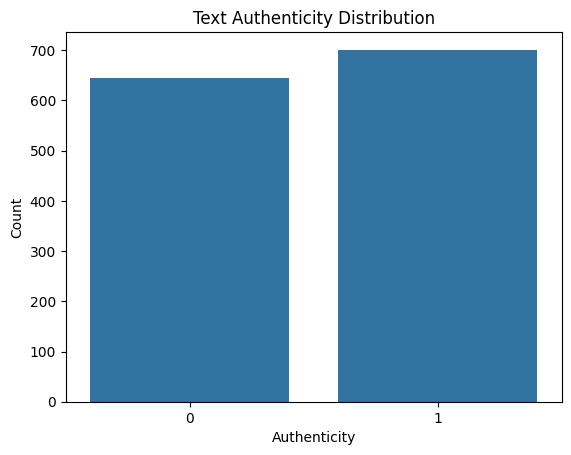

In [97]:
sns.countplot(x=df['label'])
plt.title('Text Authenticity Distribution')
plt.xlabel('Authenticity')
plt.ylabel('Count')
plt.show()

In [98]:
df.drop('lang', axis = 1, inplace = True)

In [99]:
df.head()

,text,label
0,Le Ministre de l'Enseignement Supérieur a anno...,0
1,SCANDALE ABSOLU !!! On nous ment ! Des 'source...,1
2,"Cotonou, azɔ̌ e gando alɔdoɖo weziza wu é sín ...",0
3,ÌMỌ̀LẸ̀ TÚTÙ! Àwọn onímọ̀ sáyẹ́ǹsì kan tí a kò...,1
4,La Police Républicaine a mené une opération de...,0


In [100]:
X = df['text'].values
y = df['label'].values

In [103]:
oe = OrdinalEncoder()
y = oe.fit_transform(y.reshape(-1,1))

In [106]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [108]:
model = SVC(random_state=0)
model.fit(X,y)

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=0)

In [109]:
model.score(X,y)

0.9992565055762082

In [110]:
import joblib

In [111]:
joblib.dump(model, 'text_aut.joblib')

['text_aut.joblib']

In [112]:
joblib.dump(oe, 'text_OrdEnc.joblib')

['text_OrdEnc.joblib']

In [113]:
joblib.dump(cv, 'text_cv.joblib')

['text_cv.joblib']

In [114]:
model.predict(X)

array([0., 1., 0., ..., 0., 1., 0.])